## Week 8

For the purpose of this assignment, we'll be using Mary Shelley's *Frankenstein*, which is provided in plain text UTF-8 via the [Gutenberg Project](http://www.gutenberg.org/ebooks/42324).

In [44]:
import nltk
from nltk.corpus import stopwords
import requests
import string
import matplotlib.pyplot as plt

url = "http://www.gutenberg.org/cache/epub/42324/pg42324.txt"
response = requests.get(url)
frankenstein = response.text

frankenstein = nltk.word_tokenize(frankenstein)

# set lowercase
frankenstein = [w.lower() for w in frankenstein]

# strip stopwords & punctuation
stop_words = set(stopwords.words('english'))
filtered_frank = []
stop = stop_words | set(string.punctuation)
for w in frankenstein:
    if w not in stop:
        filtered_frank.append(w)
        
freq = [filtered_frank.count(w) for w in filtered_frank]
franken_dict = dict(zip(filtered_frank, freq))

In order to analyze the corpus, we'll need to clean up the text by setting all the words to lowercase, and removing the common words and punctuations.  `nltk` has a list of stop words for us to use, and the `string` library has a list of punctuations.  We'll filter the `Frankenstein` text using those lists.

In [45]:
f_words = [(franken_dict[key], key) for key in franken_dict]
f_words.sort()
f_words.reverse()

In [71]:
f_words[:200]

[(458, '``'),
 (360, "''"),
 (233, 'one'),
 (206, '--'),
 (205, 'could'),
 (198, 'would'),
 (155, 'yet'),
 (138, 'man'),
 (137, 'upon'),
 (128, 'father'),
 (125, 'life'),
 (122, 'every'),
 (115, 'may'),
 (113, 'first'),
 (111, 'might'),
 (110, 'time'),
 (110, 'shall'),
 (107, 'eyes'),
 (105, 'said'),
 (99, 'even'),
 (98, 'saw'),
 (95, 'towards'),
 (93, 'night'),
 (93, 'found'),
 (92, 'elizabeth'),
 (91, 'mind'),
 (87, 'project'),
 (87, 'day'),
 (86, "'s"),
 (85, 'ever'),
 (81, 'work'),
 (81, 'must'),
 (80, 'thought'),
 (80, 'felt'),
 (79, 'death'),
 (78, 'heart'),
 (76, 'feelings'),
 (75, 'many'),
 (72, 'still'),
 (72, 'soon'),
 (72, 'made'),
 (72, 'friend'),
 (72, 'dear'),
 (70, 'also'),
 (69, 'thus'),
 (69, 'passed'),
 (68, 'never'),
 (67, 'us'),
 (66, 'miserable'),
 (64, 'human'),
 (64, 'became'),
 (63, 'place'),
 (63, 'like'),
 (63, 'heard'),
 (60, 'sometimes'),
 (59, 'love'),
 (59, 'clerval'),
 (58, 'little'),
 (58, 'appeared'),
 (57, 'see'),
 (57, 'often'),
 (56, 'words'),
 (56, 

Our attempt to clean the text was not a 100% perfect.  There were some punctuations not in `string`'s list, such as the more basic em dash `--`.  

For unique words, the obvious answer will be words that have a frequency of `1`, but honestly that feels *too* unique.  We should at least take into account any words that are featured twice.  This means they are unique, but they also have enough meaning within the corpus to appear a second time.

In [68]:
f_words[-4652:-3430]

[(2, 'yon'),
 (2, 'www.gutenberg.org/donate'),
 (2, 'wrong'),
 (2, 'writings'),
 (2, 'writhed'),
 (2, 'wrecked'),
 (2, 'woful'),
 (2, 'withstand'),
 (2, 'withered'),
 (2, 'withdrew'),
 (2, 'wishing'),
 (2, 'windsor'),
 (2, 'win'),
 (2, 'widow'),
 (2, 'widest'),
 (2, 'wicked'),
 (2, 'whisper'),
 (2, 'whirlwinds'),
 (2, 'wherever'),
 (2, 'whenever'),
 (2, 'westmorland'),
 (2, 'wert'),
 (2, 'welfare'),
 (2, 'wedding-night'),
 (2, 'weakened'),
 (2, 'ways'),
 (2, 'waved'),
 (2, 'warranty'),
 (2, 'warmest'),
 (2, 'warmer'),
 (2, 'war'),
 (2, 'wantonly'),
 (2, 'wanderer'),
 (2, 'waiting'),
 (2, 'vows'),
 (2, 'vowed'),
 (2, 'visage'),
 (2, 'vintage'),
 (2, 'villain'),
 (2, 'villa'),
 (2, 'vigour'),
 (2, 'vices'),
 (2, 'verdure'),
 (2, 'verdant'),
 (2, 'vent'),
 (2, 'varied'),
 (2, 'vanilla'),
 (2, 'vacancy'),
 (2, 'uttering'),
 (2, 'utensils'),
 (2, 'usually'),
 (2, 'usefulness'),
 (2, 'upright'),
 (2, 'unwholesome'),
 (2, 'untimely'),
 (2, 'unspeakable'),
 (2, 'unsatisfied'),
 (2, 'unrestrain

We see that, again, our cleaning wasn't perfect.  Still, we have approximately 1,222 unique words that appear within this version of *Frankenstein* out of 7,631 distinct words.

As our corpus is a work of fiction, we can also attempt to classify the characters as unique words, along with the settings. 

In [108]:
u = ["victor", "frankenstein", "elizabeth", "lavenza",
         "caroline", "alphonse", "william", "henry", "clerval",
         "justine", "creature", "monster", "robert", "walton",
         "de lacy", "felix", "agatha", "safie", "russia",
         "geneva", "ingolstadt", "chamounix", "montavert",
         "italy", "germany", "england", "orkney", "scotland",
         "ireland"]


u_words = []
for w in f_words:
    if w[1] in u:
        u_words.append(w)
        
u_words

[(92, 'elizabeth'),
 (59, 'clerval'),
 (55, 'justine'),
 (49, 'felix'),
 (45, 'creature'),
 (37, 'geneva'),
 (33, 'frankenstein'),
 (30, 'monster'),
 (28, 'victor'),
 (27, 'henry'),
 (25, 'william'),
 (25, 'safie'),
 (21, 'agatha'),
 (17, 'england'),
 (16, 'ingolstadt'),
 (8, 'walton'),
 (7, 'italy'),
 (6, 'scotland'),
 (5, 'chamounix'),
 (4, 'lavenza'),
 (4, 'ireland'),
 (4, 'germany'),
 (3, 'caroline'),
 (2, 'russia'),
 (1, 'robert'),
 (1, 'orkney'),
 (1, 'alphonse')]

In [112]:
u_count = 0
for num in u_words:
    u_count += num[0]
u_count / sum(freq)

0.0016986755335120047

In this case, we only have 27 unique words out of 7,631 distinct words.  Those 27 words appear 605 times, which is only 0.04 percent of the corpus.

Text(0.5, 1.0, 'Relative Frequency of Top 200 Words')

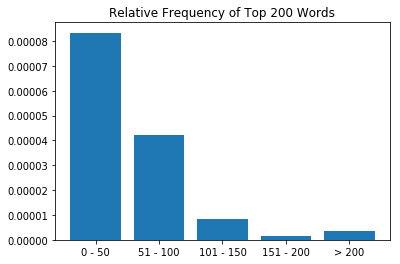

In [113]:
top200 = f_words[:200]
totalwords = sum(freq)

def rel_freq(wordlist, n):
    # 0 - 50
    n1 = 0.0
    # 51 - 100
    n2 = 0.0
    #101 - 150
    n3 = 0.0
    #151 - 200
    n4 = 0.0
    # > 200
    n5 = 0.0
    
    for w in wordlist:
        if w[0] <= 50:
            n1 += 1.0
        elif w[0] >= 51 and w[0] <= 100:
            n2 += 1.0
        elif w[0] >= 101 and w[0] <= 150:
            n3 += 1.0
        elif w[0] >= 151 and w[0] <= 200:
            n4 += 1.0
        else:
            n5 += 1.0
            
    return [n1/n, n2/n, n3/n, n4/n, n5/n]

buckets = rel_freq(top200, totalwords)
labs = ["0 - 50", "51 - 100", "101 - 150", "151 - 200", "> 200"]
plt.bar(labs, buckets)
plt.title("Relative Frequency of Top 200 Words")

Having graphed the relative frequency of the 200 highest frequency words, we see that Zipf's law does not necessarily line up in this example.  The top two words have a frequency of 458 and 360.  Without even calculating their individual relative frequency, we can see that 458 is not at all close to being two times 360.  Indeed, their relative frequencies are:

In [104]:
one = 458 / totalwords
two = 360 / totalwords

print([one, two])

[0.0003183279027612513, 0.0002502140720394115]


There are possible reasons why *Frankenstein* doesn't follow Zipf's law.  The most obvious reason is that we have eliminated the common stop words.  Had we included the words like `the` or `and` or `of`, we might actually see the corpus align to Zipf's law.

In regards to the frequency of the words in *Frankenstein* compared against "all words in all corpora", we would likely see a large overlap in words to other literary works, with perhaps the largest overlap with genre fiction like sci-fi and fantasy.  And yet we must also consider that Mary Shelley published *Frankenstein* in 1818.  There are likely some archaic spelling of words, or archaic usage of words present.